### Grid based-filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import dataset_loader, SCPlot


sc, coordinates = dataset_loader.load_paper_data()
# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


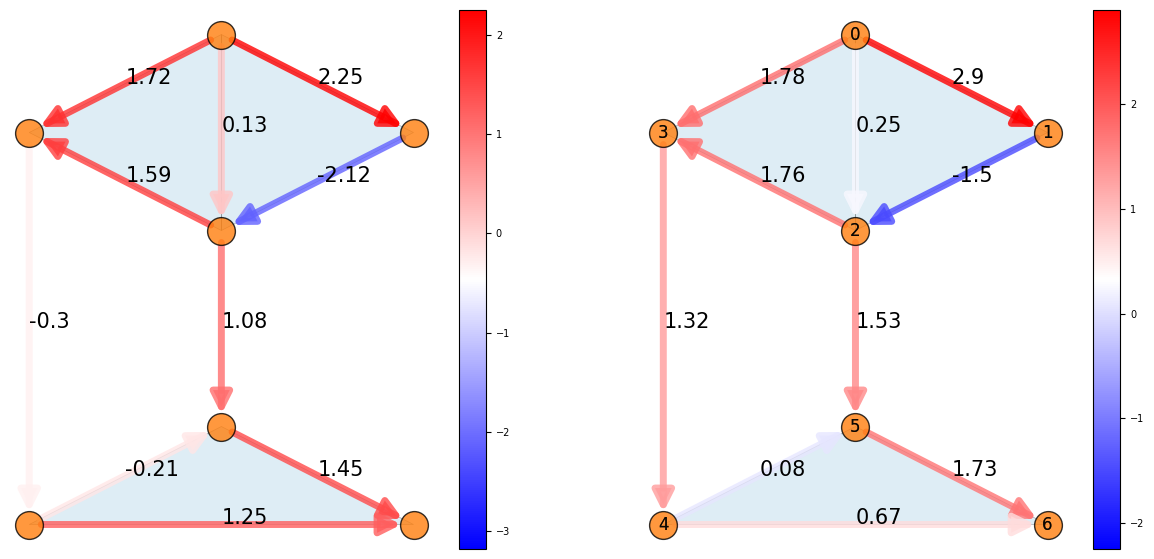

In [3]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

In [4]:
from sclibrary.filters import GridBasedFilterDesign

gbf = GridBasedFilterDesign(sc)

### Denoising

Filter size: 0 - Error: 0.5470748409907165
Filter size: 1 - Error: 0.7253847458975021
Filter size: 2 - Error: 0.7334733517882719
Filter size: 3 - Error: 0.7325779138357084
Filter size: 4 - Error: 0.7302570389755401
Filter size: 5 - Error: 0.7310473682837365
Filter size: 6 - Error: 0.73090701770242
Filter size: 7 - Error: 0.7309386198143929
Filter size: 8 - Error: 0.730939734614412
Filter size: 9 - Error: 0.7309440468585862


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


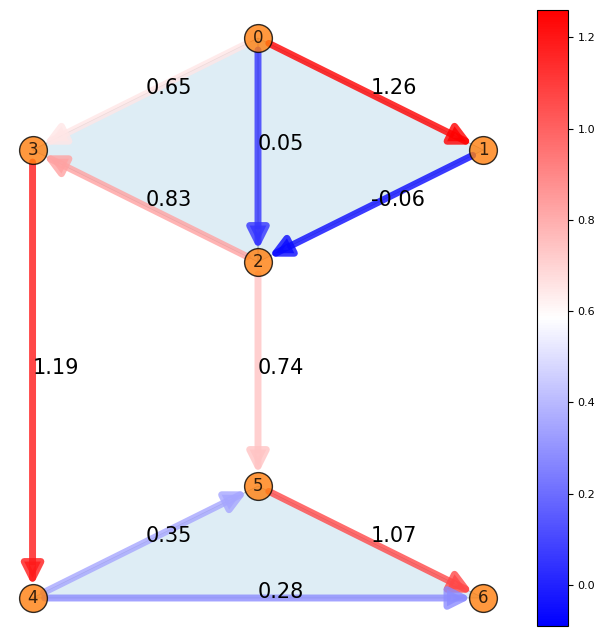

In [5]:
filter_size = 10
gbf.denoise(f=f, f_true=f0,  L=filter_size, p_choice="L1L", mu=0.5)

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type I

Filter size: 0 - Error: 0.48100470416418967
Filter size: 1 - Error: 0.36919329741281043
Filter size: 2 - Error: 0.3691932974128103
Filter size: 3 - Error: 0.3859624677562695


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


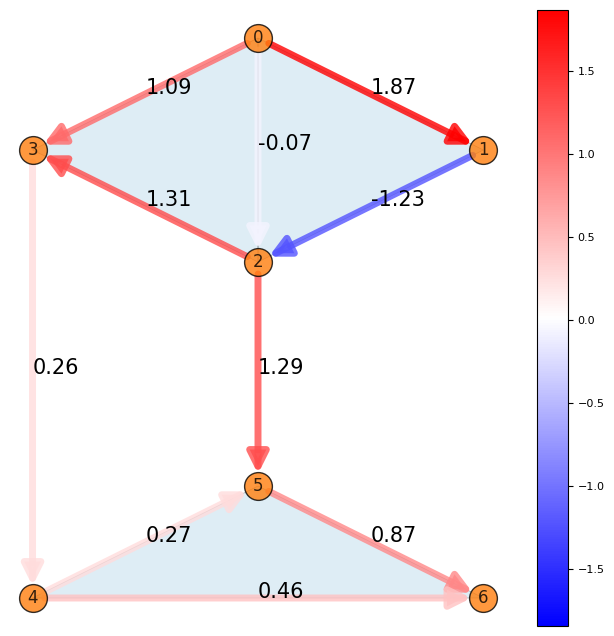

In [6]:
filter_size = 4
gbf.subcomponent_extraction(f=f, f_true=f0,  L=filter_size, p_choice="L1", component="gradient")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type II

Filter size: 0 - Error: 0.4214757852304542
Filter size: 1 - Error: 0.3151614445142359
Filter size: 2 - Error: 0.36216022067274345
Filter size: 3 - Error: 0.3319471415637245


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


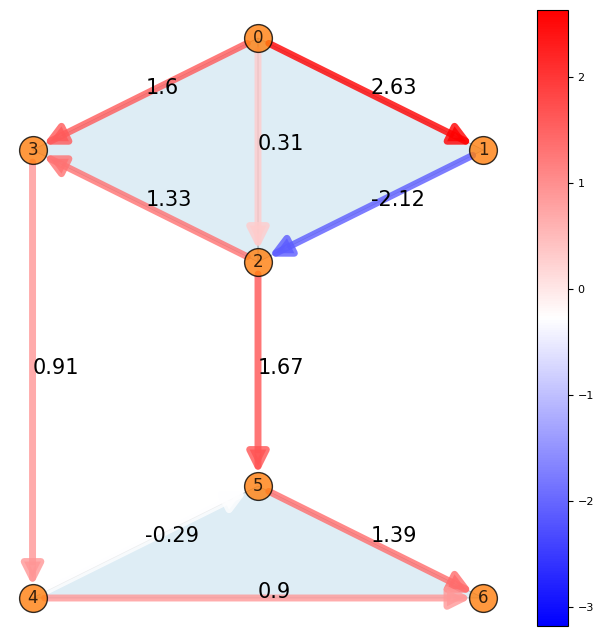

In [9]:
ilter_size = 1
gbf.subcomponent_extraction(f=f, f_true=f0,  L=filter_size, p_choice="L1L")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### General Filter

Filter size: 0 - Filter approximation error: 0.4731767274523985
[0.54707484]
Filter size: 0 - Filter approximation error: 0.29951889577832264
[0.42584421]


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


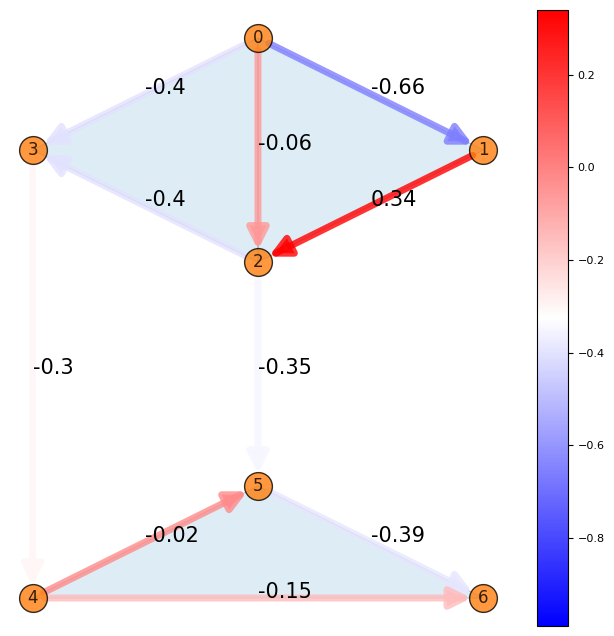

In [9]:
gbf = GridBasedFilterDesign(sc)

f_est_h, f_est_c, f_est_g = gbf.general_filter(
     f=f, f_true=f0, L1 = 1, L2 = 1
)

scplot.draw_network(edge_flow=np.round(f_est_h, 2))

In [10]:
gbf.history

{'L1': {'filter': array([[0.72861713, 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.72861713, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.72861713, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.72861713, 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.72861713,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.72861713, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.72861713, 0.        , 0.        , 0.        